In [57]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)
import numpy as np

In [161]:
data = pd.read_csv('../Downloads/wine.data', header=None)

In [162]:
data.columns = ['Class','Alcohol', 'Malic acid', 'Ash',
               'Alcalinity of ash', 'Magnesium', 'Total phenols',
               'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
               'Color Intensity', 'Hue', 'OD280/315 of diluted wines', 'Proline']

In [163]:
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [164]:
train = data.iloc[:, 1:13]

In [165]:
# check % of missing values in each variable
train.isnull().sum()/len(train)*100

Alcohol                       0.0
Malic acid                    0.0
Ash                           0.0
Alcalinity of ash             0.0
Magnesium                     0.0
Total phenols                 0.0
Flavanoids                    0.0
Nonflavanoid phenols          0.0
Proanthocyanins               0.0
Color Intensity               0.0
Hue                           0.0
OD280/315 of diluted wines    0.0
dtype: float64

In [166]:
# Check variance of features
train.var()

Alcohol                         0.659062
Malic acid                      1.248015
Ash                             0.075265
Alcalinity of ash              11.152686
Magnesium                     203.989335
Total phenols                   0.391690
Flavanoids                      0.997719
Nonflavanoid phenols            0.015489
Proanthocyanins                 0.327595
Color Intensity                 5.374449
Hue                             0.052245
OD280/315 of diluted wines      0.504086
dtype: float64

In [167]:
# Remove features with low variance
low_var = []
for i in range(len(train.var())):
    if train.var()[i] < 0.5:
        low_var.append(train.columns[i])

In [168]:
low_var

['Ash', 'Total phenols', 'Nonflavanoid phenols', 'Proanthocyanins', 'Hue']

In [169]:
# Check correlation of features
train.corr().abs().unstack().drop_duplicates().sort_values(ascending=False)

# upper triangle of correlation matrix
upper = train.corr().abs().where(np.triu(np.ones(train.corr().abs().shape), k=1).astype(bool))

# Get columns where correlation is greater than 0.5
high_corr = [col for col in upper.columns if any(upper[col]>=0.6)]

In [170]:
to_drop = low_var + high_corr

In [171]:
len(to_drop)

8

### Standard scaling

In [172]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [173]:
x = data.iloc[:,1:13].values

In [174]:
y = data.iloc[:,0].values

In [175]:
sc = StandardScaler()

In [176]:
x = sc.fit_transform(x)

In [177]:
x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.25171685,
         0.36217728,  1.84791957],
       [ 0.24628963, -0.49941338, -0.82799632, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 0.20923168,  0.22769377,  0.01273209, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.39508604,  1.58316512,  1.36520822, ...,  1.79166599,
        -1.52437837, -1.42894777]])

### Covariance matrix and eigendecomposition

In [65]:
cov_matrix = np.cov(x.T)

In [68]:
# Eigendecomposition
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [69]:
# 
eig_val

array([4.42079223, 2.18758658, 1.42758975, 0.89289016, 0.82042272,
       0.63552536, 0.55097787, 0.34868444, 0.10400644, 0.17046215,
       0.26100162, 0.24785727])

In [76]:
eig_vec

array([[ 9.11169231e-02,  5.13423477e-01, -2.72161171e-01,
         5.63474760e-02, -3.46100455e-01,  3.07290849e-01,
         1.10711168e-02,  4.76373100e-01, -1.99337075e-02,
         2.99147087e-01,  3.10651055e-01, -1.52281965e-01],
       [-2.70461420e-01,  2.12854112e-01,  5.36754992e-02,
         4.79292304e-01,  3.74837071e-01,  4.49504530e-01,
         4.24980530e-01,  5.97826234e-02, -2.54783201e-02,
        -1.26378200e-01, -2.01018175e-01,  2.55290246e-01],
       [-3.22864546e-02,  3.68822568e-01,  6.04042874e-01,
        -1.11362110e-01, -2.23411700e-01,  1.98970633e-01,
        -1.21932106e-01, -1.78045870e-01,  1.37505811e-01,
         8.00587449e-02, -4.55101726e-01, -3.42276908e-01],
       [-2.34040839e-01,  8.08713241e-04,  6.22591626e-01,
         5.77734149e-02,  1.49721506e-01, -1.34509215e-01,
        -3.23527979e-01,  4.14438894e-01, -8.66273232e-02,
         2.04731976e-02,  3.89504948e-01,  2.78728137e-01],
       [ 1.15882168e-01,  3.60852218e-01,  7.9681974

**The eigenvectors with the lowest eigenvalues describe the least amount of variation within the dataset. Therefore, these values can be dropped.**

In [78]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

### PCA

In [13]:
# Matplotlib
% matplotlib inline
import matplotlib.pyplot as plt

In [20]:
# PCA
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=12, whiten = False, random_state = 2019)

In [101]:
x_pca = pca.fit_transform(x)

### Choosing number of components

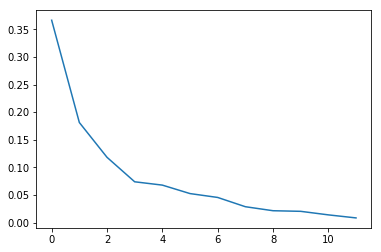

In [104]:
# Elbow method scree plot:
plt.plot(pca.explained_variance_ratio_)

Text(0,0.5,'Cumulative Sum')

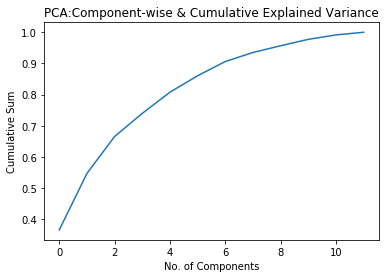

In [103]:
# Scree plot: displays the variance explained by each principal component within the analysis.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA:Component-wise & Cumulative Explained Variance")
plt.xlabel("No. of Components")
plt.ylabel("Cumulative Sum")

**We can see how much of the variance is represented by the n components:**

In [27]:
 pca.explained_variance_ratio_.sum()

1.0000000000000002

### Alternatively, we can also create the PCA object that would help us explain xx% of the variance:

In [28]:
pca_percent = PCA(n_components=0.90)

In [29]:
x_pca_per = pca_percent.fit_transform(x)
explained_variance_per = pca_percent.explained_variance_ratio_

In [30]:
explained_variance_per

array([0.36632969, 0.18127473, 0.11829747, 0.07398949, 0.06798447,
       0.05266292, 0.04565687])

In [34]:
# Percentage of variance explained
explained_variance_per.sum()

0.906195640366397

### Using PCA to filter out noise 

In [105]:
from sklearn.datasets import load_digits

In [106]:
digits = load_digits()

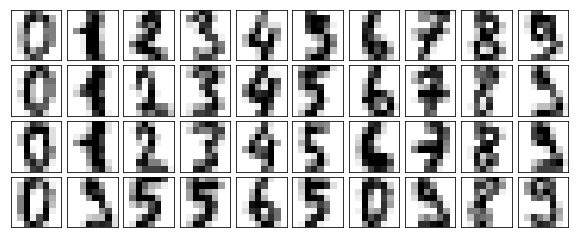

In [108]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

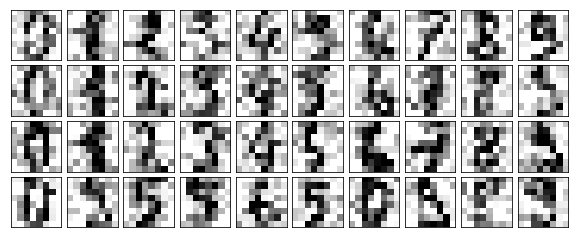

In [109]:
# Add noise into dataset, check
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

14


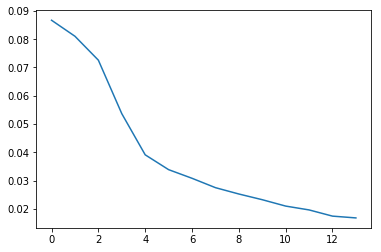

In [140]:
pca_digits = PCA(n_components=14).fit(noisy)
print(pca_digits.n_components_)

plt.plot(pca_digits.explained_variance_ratio_)

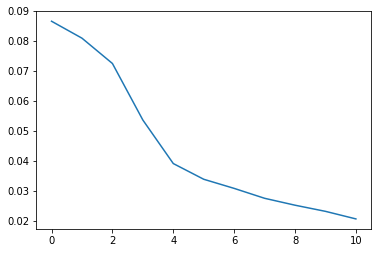

In [136]:
plt.plot(pca_digits.explained_variance_ratio_)

**12 seems to be the lowest point **

80% of the variance amounts to 36 principal components.
Compute the components and use inverse_transform to reconstruct the filtered digits

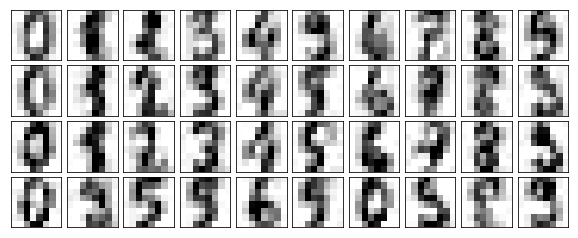

In [144]:
pca_digits1 = PCA(n_components=12).fit(noisy)
digits_components = pca_digits1.transform(noisy)
digits_filtered = pca_digits1.inverse_transform(digits_components)
plot_digits(digits_filtered)

### RandomizedPCA
- Randomized method to approximate the first N principal components much more quickly than standard PCA
- Useful for v. high dimensional data (e.g. 3000 dimensions (images))

In [146]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [153]:
pca_faces = PCA(n_components=150, svd_solver='randomized')
pca_faces_fit = pca_faces.fit(faces.data)

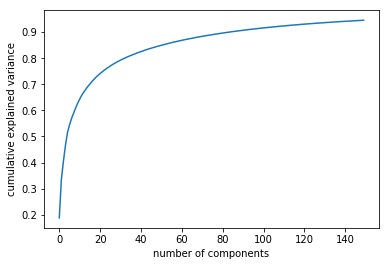

In [151]:
plt.plot(np.cumsum(pca_faces.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [154]:
# Compute the components and projected faces
components = pca_faces_fit.transform(faces.data)
projected = pca_faces_fit.inverse_transform(components)

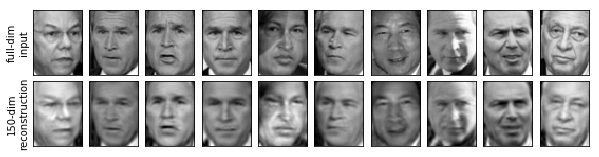

In [155]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

Although dimensionality of data was reduced by ~20x, the reconstruction images are still recognizable. This means that we could train our classifier on 150-dimensional data instead of 3000 which could lead to a more efficient model.

### PCA visualization

**PCA biplot for 2 components**
- Loading plot (the one with red lines)
- PCA score plot (the one looking like scatter plot)

This plot helps us to see association between features. Serves as a visualization

In [91]:
def PCA_score_plot(score, coeff):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)

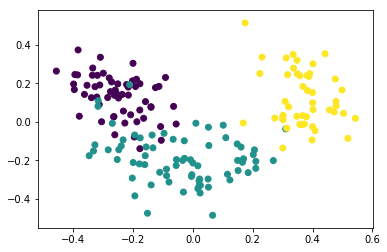

In [92]:
PCA_score_plot(x_pca[:,0:2], np.transpose(pca.components_[0:2,:]))

In [88]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

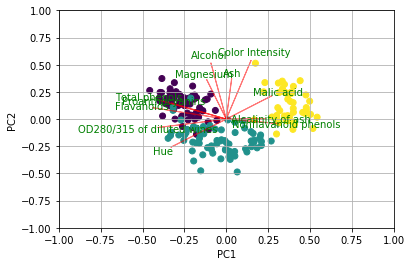

In [95]:
## project data into PC space
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

myplot(x_pca[:,0:2], np.transpose(pca.components_[0:2,:]), labels=train.columns)

- Var4 and var 8 are highly correlated to each other as they are very close, forming a small angle.
- Var 3 and Var 8 are not likely to be correlated at all as they meet each other at 90 degree.
- Var 12 and var4/var 8 might be negatively correlated due to the angle between them being close to 180 degree.


PCs are ranked by **importance** so PC1 revleas the most variation followed by PC2. Thus, differences among clusters along PC1 axis are actually **larger** than similar-looking distances along PC2.

### Factor Analysis

In [36]:
from sklearn.decomposition import FactorAnalysis

In [40]:
FA = FactorAnalysis(n_components=7)
x_FA = FA.fit_transform(x)

In [42]:
x_FA[:5]

array([[-1.05589291,  0.97383752, -0.33245704,  1.10579471, -0.15569016,
        -0.85406022,  0.55518198],
       [-0.85634132, -0.21166862, -1.00229918,  0.11743887, -0.02553529,
        -0.68223758, -0.2676339 ],
       [-0.90583289,  0.97499173,  0.5639534 , -0.39661099,  0.32727631,
         0.50006176,  0.09759399],
       [-1.11181807,  1.87578675, -0.69245065, -0.12407189,  0.3466641 ,
        -0.046698  ,  0.23529504],
       [-0.57761258,  0.77407704,  1.7052747 ,  0.56575651, -0.00801503,
        -0.33501503,  0.48478132]])

In [170]:
for score in FA.score_samples(x):
    print(score)

-14.243499091103628
-13.870484088500678
-12.897669483008823
-14.323054879783367
-12.487797294376803
-12.630147101600482
-13.542325364507223
-14.020760475595342
-13.678891434144864
-12.587901465515746
-12.478343550382354
-12.46639089179144
-11.740237791683247
-19.01183462304133
-15.882454842887888
-13.322728921178351
-12.720879844271344
-13.043203378882597
-14.675247067815626
-13.630793422365876
-13.089447183723259
-13.518594834401735
-12.872304247832748
-12.214706931327324
-12.828445585936652
-16.941504335995383
-12.528804073197874
-11.119929495519445
-12.864275543612365
-12.519517683043535
-13.51736134253436
-11.675150141769562
-12.073586559926738
-15.987644392823348
-11.581723529817586
-11.328237874186478
-13.471091203902382
-11.325911203739318
-11.702901393915363
-16.885479531120172
-12.42846972214551
-13.053786420526132
-13.953680649421571
-12.643394758166696
-12.044449868591506
-14.611150329628089
-13.912996572077633
-12.505070890916143
-11.84000400987997
-13.338193657367581
-16.3

### Non-linear dimensionality reduction: Kernel PCA
Usually used if PCA plot denotes that data is not linearly separable

In [157]:
from sklearn.decomposition import KernelPCA

In [179]:
kpca = KernelPCA(kernel='cosine', n_components=0.9)

In [180]:
x_kpca = kpca.fit_transform(x)

TypeError: slice indices must be integers or None or have an __index__ method

### Truncated SVD 